First make sure that Qiskit is installed properly

In [1]:
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer
!pip install qiskit_experiement 
!pip install seaborn
from seaborn import *
from qiskit_aer import AerSimulator

zsh:1: no matches found: qiskit[visualization]
ERROR: Could not find a version that satisfies the requirement qiskit_experiement (from versions: none)
ERROR: No matching distribution found for qiskit_experiement


In [2]:
import qiskit

### Building a Circuit and the Circuit Structure

In [3]:
# 3 qubit circuit
circ = qiskit.QuantumCircuit(3)

# add a H gate on qubit 0 and 1
circ.h(0)
circ.h(1)

# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(1, 2)

# alternatively append gates
hgate = qiskit.circuit.library.HGate()
circ.append(hgate, [1])

print(circ) # inline print of the circuit diagram

     ┌───┐          
q_0: ┤ H ├──────────
     ├───┤     ┌───┐
q_1: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
q_2: ─────┤ X ├─────
          └───┘     


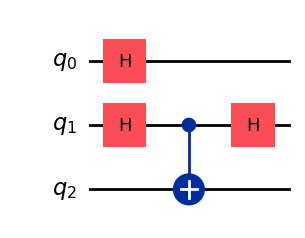

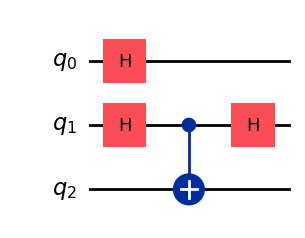

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# fancy plot with matplotlib
circ.draw('mpl')

### The Quantum Gates in Qiskit
We can access the unitary matrix of the gates in qiskit, such as the X-rotation gate $\exp(-iX\theta/2)$. We can also customize our own gates for simulation purpose.

Usually we want to use the built-in gates in qiskit which are compatible with many of the built-in qiskit functions, e.g. in certain optimizations.

You can find the list of built-in gates in the qiskit documentation `qiskit.circuit.library`.

In [5]:
import numpy as np

# Hadamard gate
print('Hadamard gate:')
print(qiskit.circuit.library.HGate().to_matrix().real)

# Can access the gate for X-rotation
print('X-rotation:')
print(qiskit.circuit.library.RXGate(np.pi).to_matrix())

# for X**p gate
print('X power:')
print((qiskit.circuit.library.XGate()**0.5).to_matrix())

# two qubit CNOT gate
print('CNOT:')
print(qiskit.circuit.library.CXGate().to_matrix().real)

Hadamard gate:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
X-rotation:
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]
X power:
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
CNOT:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Qiskit allows for general single-qubit rotation such as the following
$$
U(\theta,\phi,\lambda) = \left[\begin{matrix} \cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\ e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
\end{matrix}\right]
$$

[[ 0.70710678+0.j         -0.65328148-0.27059805j]
 [ 0.5       +0.5j         0.27059805+0.65328148j]]


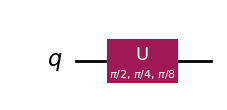

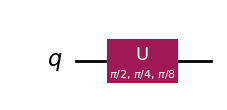

In [6]:
circ = qiskit.QuantumCircuit(1)
circ.u(np.pi/2,np.pi/4,np.pi/8,0)
print((qiskit.circuit.library.UGate(np.pi/2,np.pi/4,np.pi/8)).to_matrix())

circ.draw('mpl')

__WARNING!__

In contrast to the convention that you might be used to qiskit encodes the qubit from right to left, e.g. if $q_0 = |1\rangle$ and $q_1 = |0\rangle$ the 2-qubit state is represented as $|01\rangle$, and therefore also the tensor product is reversed, e.g. $CX$ would be represented as $X_1 \otimes I_0$, resulting in the above matrix representation.

### Hands-on coding

Can you write a function that returns the GHZ circuit on L qubits?
$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\cdots 0\rangle + |11\cdots 1\rangle\right)
$$

In [7]:
def GHZ(n):
  ghz = qiskit.QuantumCircuit(n)
  ghz.h(0)
  for i in range(n-1):
    ghz.cx(0,i+1)  # MODIFY CODE HERE!
  return ghz


print(GHZ(5))

     ┌───┐                    
q_0: ┤ H ├──■────■────■────■──
     └───┘┌─┴─┐  │    │    │  
q_1: ─────┤ X ├──┼────┼────┼──
          └───┘┌─┴─┐  │    │  
q_2: ──────────┤ X ├──┼────┼──
               └───┘┌─┴─┐  │  
q_3: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘


### Simulating the Circuit
Qiskit provides handy simulator methods for quantum circuits. If you are using your laptop, you will be performing classical simulation. From __simulations__ we can get access to the full wavefunction that is constructed and modified by the quantum circuit.

However, if you are using a real quantum processor the wavefunciton is not accessible and you have to draw samples instead. More on that will follow later.

Qiskit has many options to simulate a circuit. Here we will restrict ourself to the `AerSimulator()`, which can be used for both simulating and sampling.

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2, 2, 2))


<IPython.core.display.Latex object>

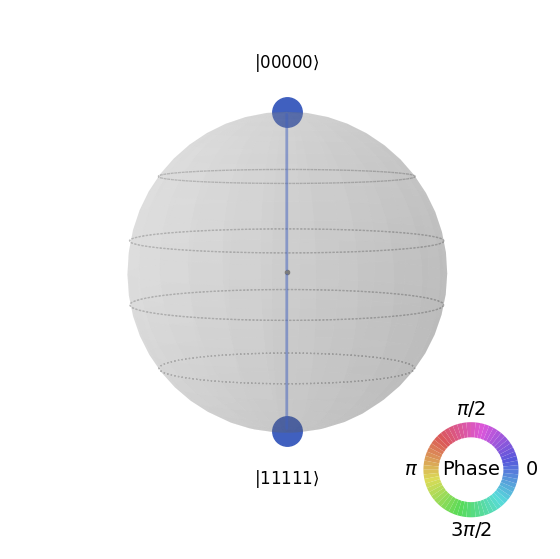

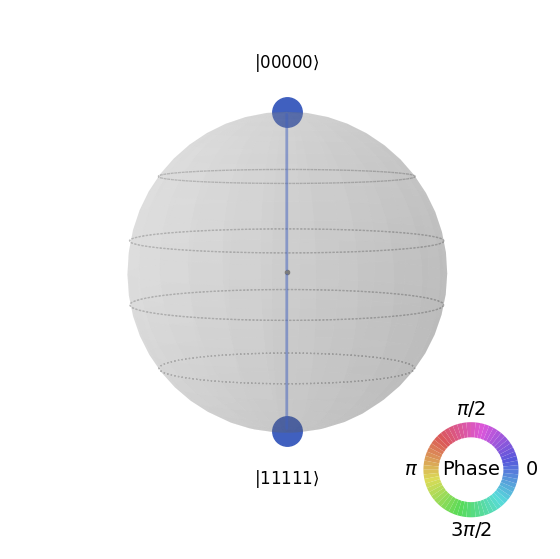

In [8]:
from qiskit_aer import AerSimulator

L = 5

# initialize the simulator in the "statevector" mode to simulate full wave function
sim = AerSimulator(method="statevector")

circ = GHZ(L)
circ.save_statevector()  # save statevector at the end of the circuit
state = sim.run(circ).result().get_statevector()

print(state)

# draw using latex
display(state.draw('latex'))

# draw on Bloch sphere
display(state.draw('qsphere'))


next we want to compute expectation values of local operators

In [9]:
from qiskit.quantum_info import Pauli

# Expectation value computed from state vector
print("Exact Expectation:")
print(f"<Z> on qubit 1 is {state.expectation_value(Pauli('Z'), [1])}")
print(f"<ZZ> on qubit 1 and 2 is {state.expectation_value(Pauli('ZZ'), [1, 2])}")

Exact Expectation:
<Z> on qubit 1 is 2.220446049250313e-16
<ZZ> on qubit 1 and 2 is 1.0


### Measurements on a circuit

On real devices we cannot simulate the full wavefunction but instead have to __measure__/ __sample__. 
In Qiskit we can mimic this by adding measurements which output the result to a classical channel.

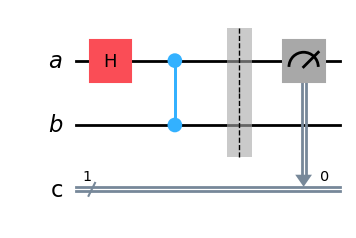

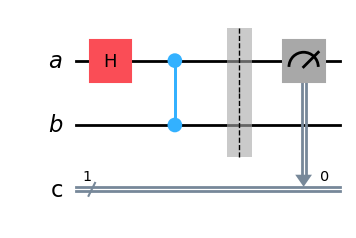

In [10]:
# define quantum and classical channels
a = qiskit.QuantumRegister(1, name = 'a')
b = qiskit.QuantumRegister(1, name = 'b')
c = qiskit.ClassicalRegister(1, name = 'c') # classical register to store the measurement outcome
circ = qiskit.QuantumCircuit(a, b, c) 
# alternative: qiskit.QuantumCircuit(2, 1) for 2 qubits and 1 classical channel


circ.h(a)
circ.cz(a, b)
circ.barrier() # visual barrier
circ.measure(a, c)  # measure qubit a and store the result in c

circ.draw('mpl')

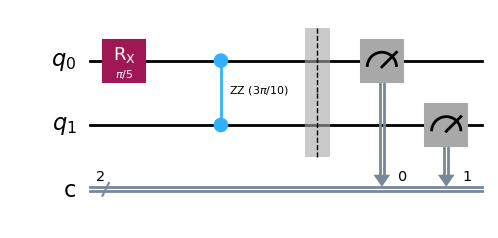

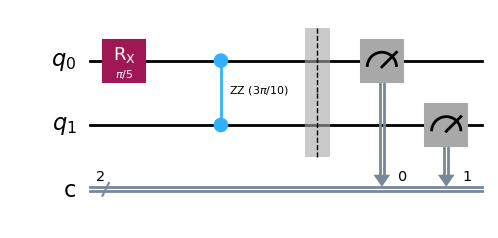

In [11]:
# Alternatively, we can shorten the codes using default namings.

circ = qiskit.QuantumCircuit(2,2)
circ.rx(0.2*np.pi, 0)
circ.rzz(0.3*np.pi, 0, 1)
circ.barrier()
circ.measure(range(2), range(2)) # Measure the Quantum bits and store the result in the Classical bits
circ.draw('mpl')

{'01': 12, '00': 88}


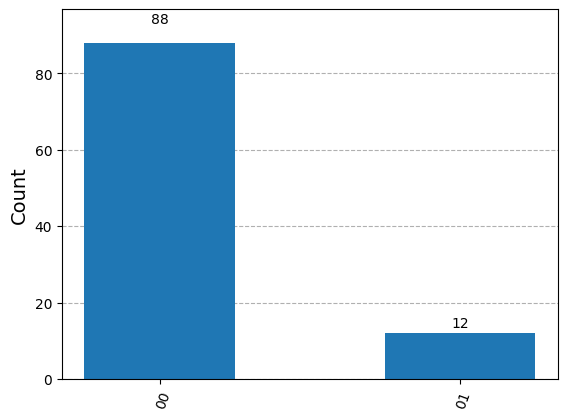

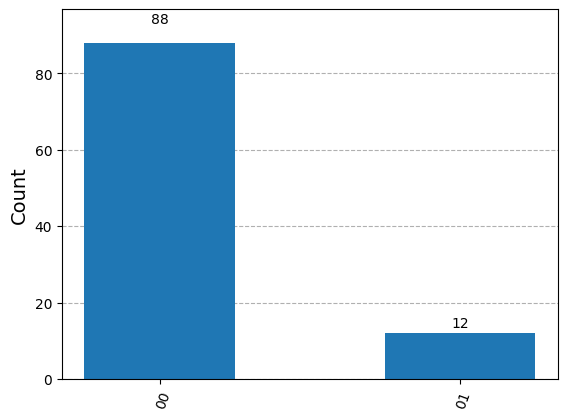

In [12]:
# run the circuit above via Aer

sim = AerSimulator()

N_shots = 100  # number of measurements

result = sim.run(circ, shots=N_shots).result()
counts = result.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Noise

In a closed system, the quantum state is always pure. However this is not true in the real world. The system will interact with the environment and become noisy.

Noise in the quantum system is in general realized by some __quantum channel__. Quantum channels map a density matrix to another density matrix of the quantum system, i.e. the quantum states are generally mixed.

Noise can be included in Qiskit simulations in many ways. Let us consider an example here, and you will get to choose your favorite approach in later exercises.

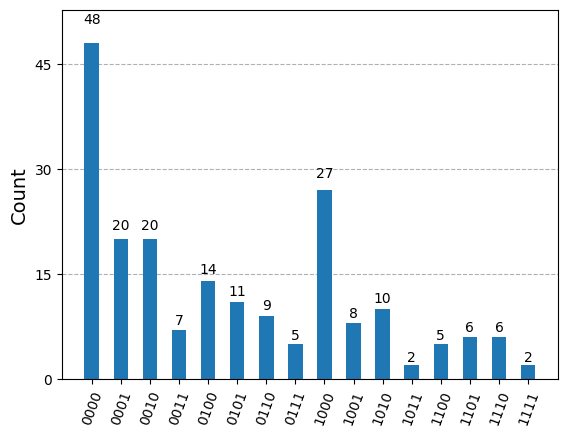

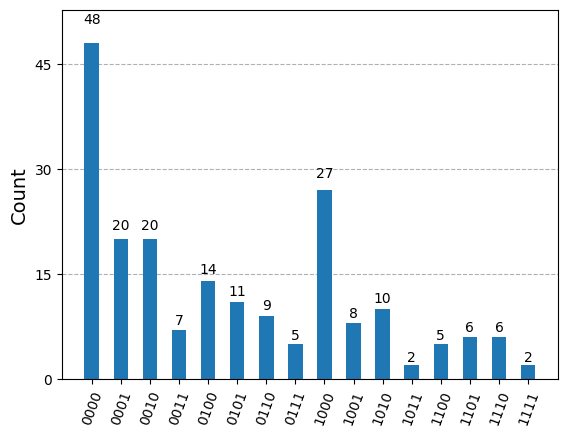

In [13]:
from qiskit.quantum_info import Pauli
from qiskit_aer.noise import NoiseModel, pauli_error

noisy_circ = qiskit.QuantumCircuit(4)
noisy_circ.measure_all() # trivial circuit, just measure

noise = NoiseModel()
# initialize bitflip error with a certain probability
p_error = 0.3
bit_flip_error = pauli_error([(Pauli('X'), p_error), (Pauli('I'), 1-p_error)])

noise.add_all_qubit_quantum_error(bit_flip_error, ['measure'])

simulator = AerSimulator(noise_model = noise)
result = simulator.run(noisy_circ, shots=200).result().get_counts(noisy_circ)
plot_histogram(result)

**Question:** How do the heights relate to the number of 1's in the bitstrings?

We can also add noise to the quantum operations.

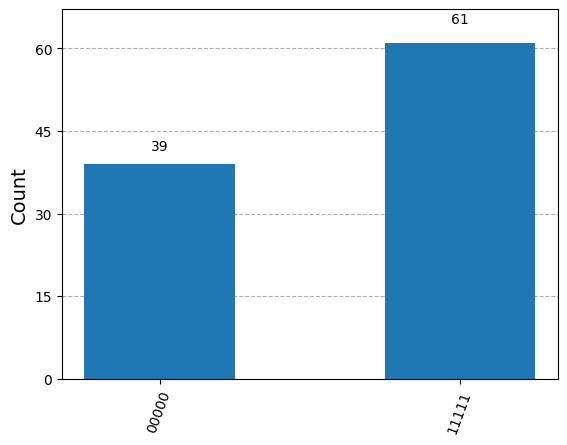

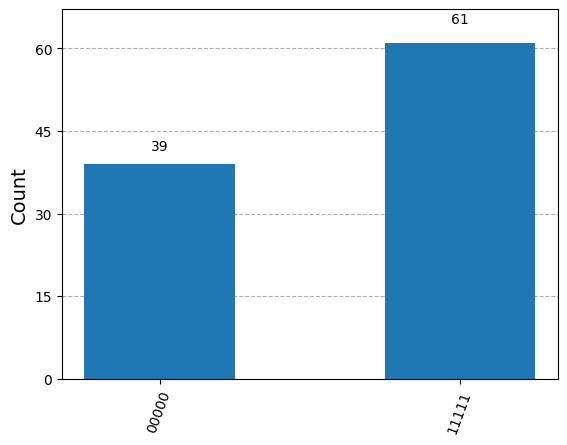

In [14]:
from qiskit_aer.noise import depolarizing_error
circ = GHZ(5)
circ.measure_all()

# Noiseless experiment
simulator = AerSimulator()
result = simulator.run(circ, shots = 100).result().get_counts(circ)
plot_histogram(result)

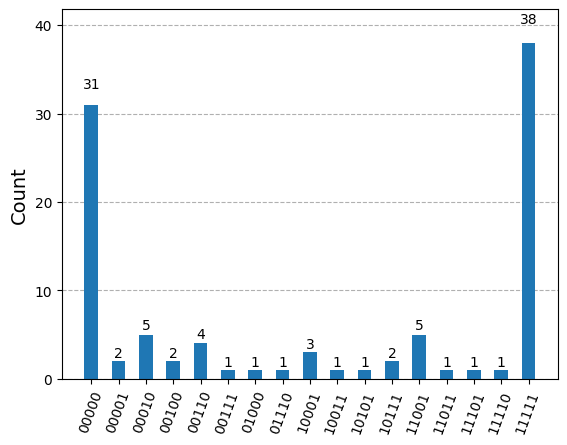

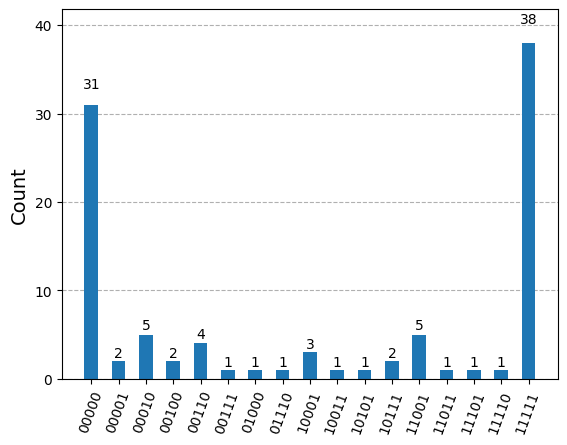

In [15]:
# Noisy experiment, where CNOTs are noisy
noise = NoiseModel()
error = depolarizing_error(param = 0.1, num_qubits = 2)
noise.add_all_qubit_quantum_error(error, ['cx'])

simulator = AerSimulator(noise_model = noise)
result = simulator.run(circ, shots = 100).result().get_counts(circ)
plot_histogram(result)

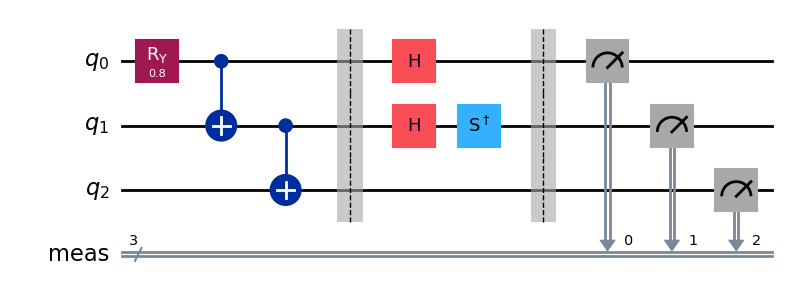

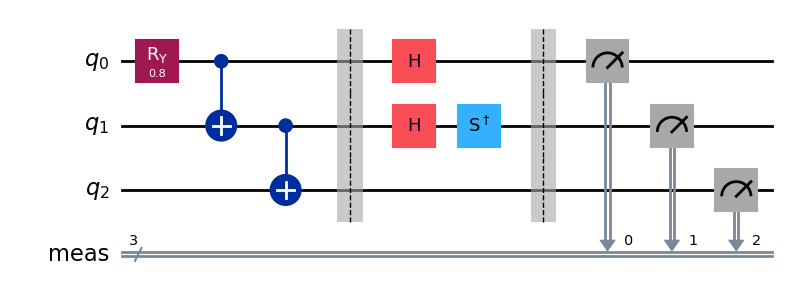

In [16]:
from qiskit.circuit import QuantumCircuit
 
# create a circuit, where we would like to measure
# q0 in the X basis, q1 in the Y basis and q2 in the Z basis
circuit = QuantumCircuit(3)
circuit.ry(0.8, 0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.barrier()
 
# diagonalize X with the Hadamard gate 
circuit.h(0)
 
# diagonalize Y with Hadamard as S^\dagger
circuit.h(1)
circuit.sdg(1)
 
# the Z basis is the default, no action required here
 
# measure all qubits
circuit.measure_all()
circuit.draw("mpl")

In [17]:
from qiskit import *
from qiskit.visualization import plot_state_city

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.measure_all()

# Define the measurement circuits in the X and Y bases
qc_x = QuantumCircuit(1)
qc_x.h(0)
qc_x.t(0)
qc_x.h(0)
qc_x.measure_all()


qc_y = QuantumCircuit(1)
qc_y.h(0)
qc_y.t(0)
qc_y.sdg(0)
qc_y.h(0)
qc_y.measure_all()

In [19]:
print(qc,qc_x,qc_y)

        ┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ T ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0          ┌───┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ T ├┤ H ├─░─┤M├
        └───┘└───┘└───┘ ░ └╥┘
meas: 1/═══════════════════╩═
                           0          ┌───┐┌───┐┌─────┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ T ├┤ Sdg ├┤ H ├─░─┤M├
        └───┘└───┘└─────┘└───┘ ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0 


{'1': 519, '0': 481}
{'1': 147, '0': 853}
{'1': 131, '0': 869}


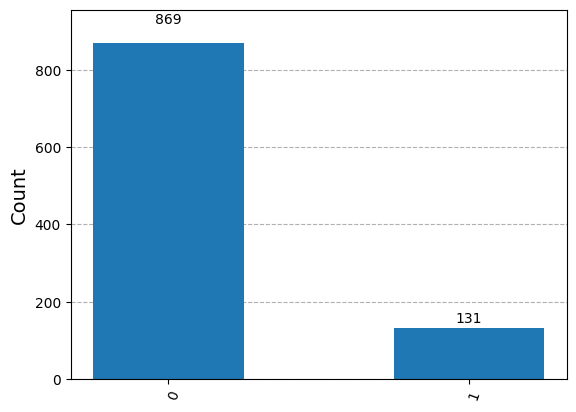

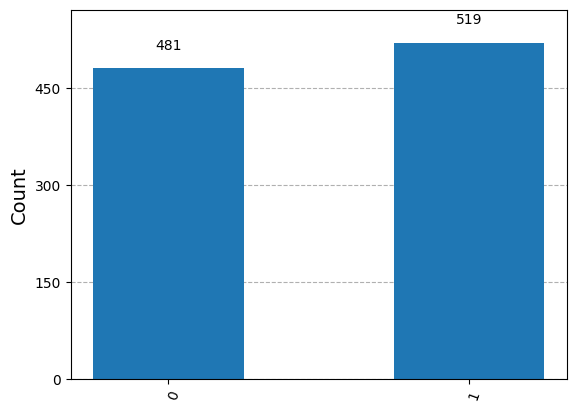

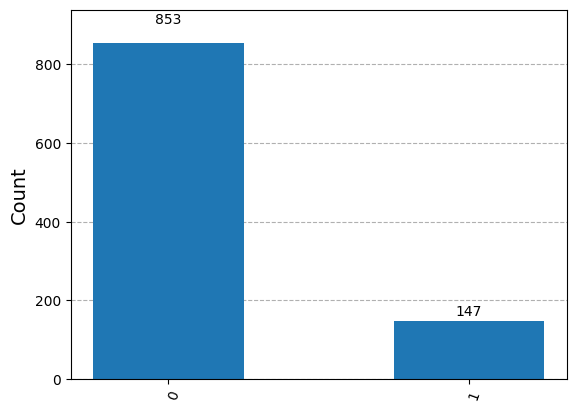

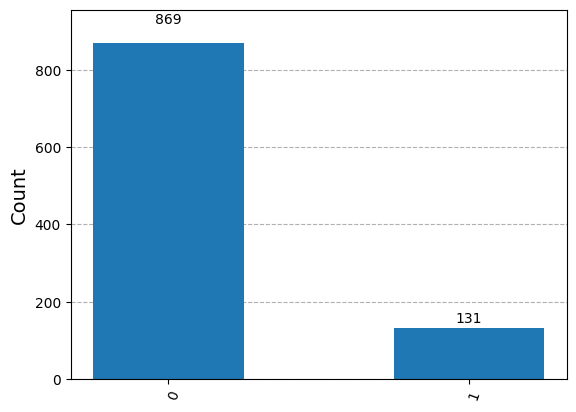

In [20]:
sim = AerSimulator()

N_shots = 1000  # number of measurements

result = sim.run(qc, shots=N_shots).result()
counts = result.get_counts(qc)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)


sim = AerSimulator()

N_shots = 1000  # number of measurements

result = sim.run(qc_x, shots=N_shots).result()
counts_x = result.get_counts(qc_x)
print(counts_x)

from qiskit.visualization import plot_histogram
plot_histogram(counts_x)



sim = AerSimulator()

N_shots = 1000  # number of measurements

result = sim.run(qc_y, shots=N_shots).result()
counts_y = result.get_counts(qc_y)
print(counts_y)

from qiskit.visualization import plot_histogram
plot_histogram(counts_y)

In [21]:
prob_0 = counts.get('0', 0) / N_shots
prob_1 = counts.get('1', 0) / N_shots
 
expec_z = prob_0 - prob_1

In [22]:
# Extract the probabilities from the counts in the X basis
prob_0_x = counts_x.get('0', 0) / N_shots
prob_1_x = counts_x.get('1', 0) / N_shots
expec_x = prob_0_x - prob_1_x

# Extract the probabilities from the counts in the Y basis
prob_0_y = counts_y.get('0', 0) / N_shots
prob_1_y = counts_y.get('1', 0) / N_shots
expec_y = prob_0_y - prob_1_y

In [23]:
print(expec_x,
expec_y,
expec_z)

0.706 0.738 -0.038000000000000034


In [24]:
c_0 = 0.5
c_1 = (expec_z) * 0.5
c_2 = (expec_x) * 0.5
c_3 = (expec_y) * 0.5

print(c_1,c_2,c_3)

-0.019000000000000017 0.353 0.369


In [25]:
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

density_matrix = s0 * c_0 + s1 * c_2 + s2 * c_3 + s3 * c_1
print(density_matrix)

[[0.481+0.j    0.353-0.369j]
 [0.353+0.369j 0.519+0.j   ]]


[0.69354164+0.j 0.72041655+0.j]
Density Matrix:


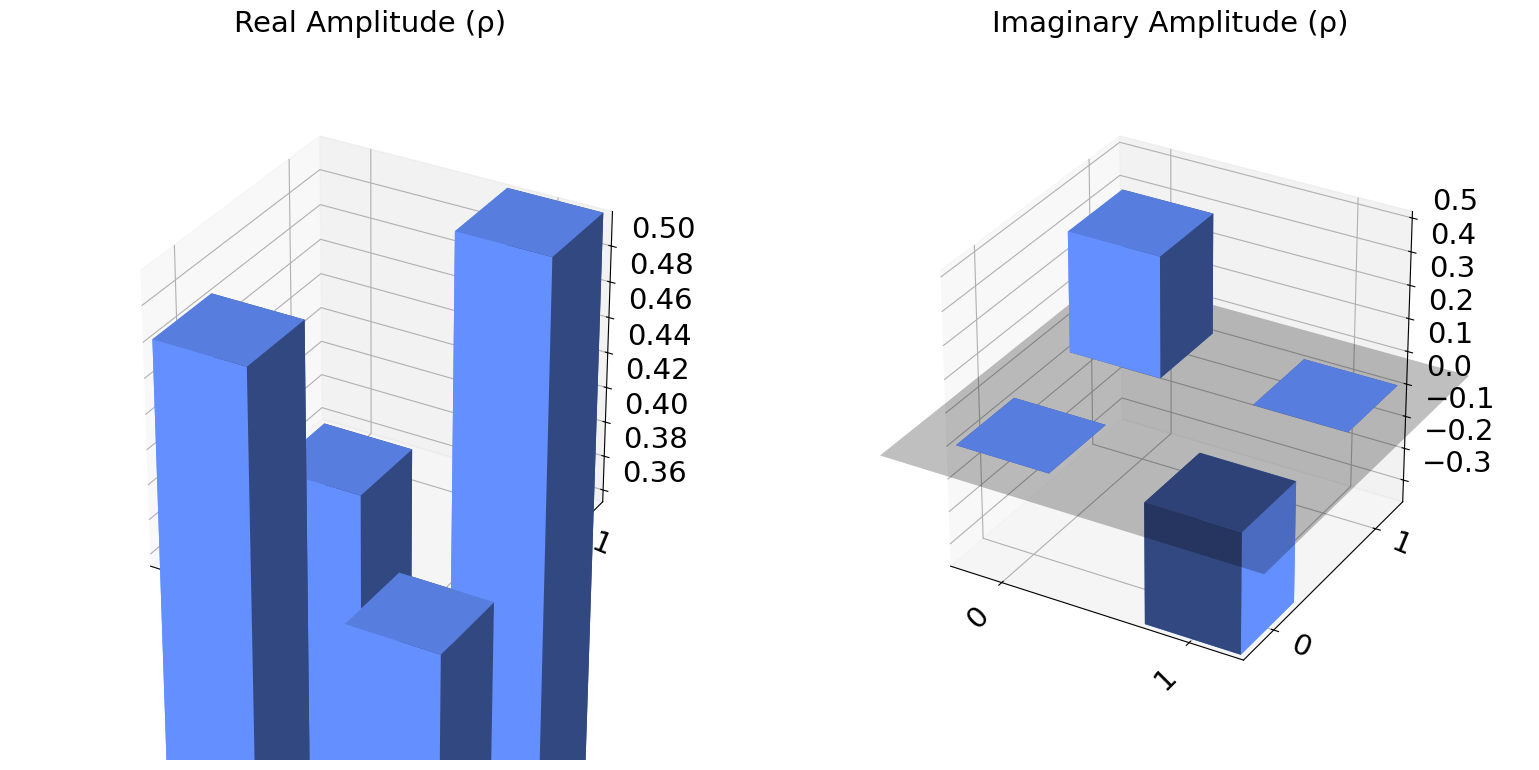

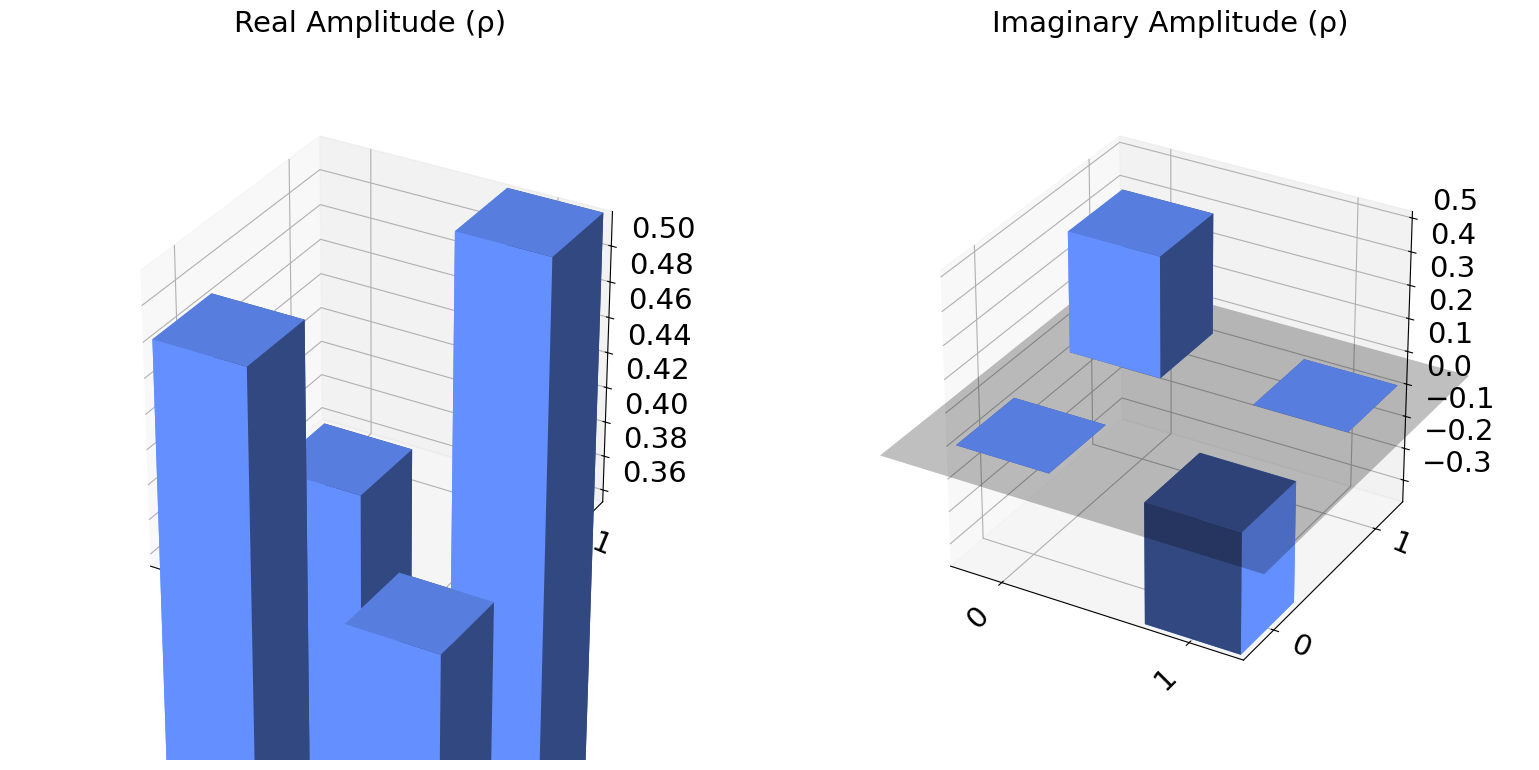

In [26]:
state_vector = np.sqrt(np.diag(density_matrix))
print(state_vector)
print("Density Matrix:")
plot_state_city(density_matrix)

In [27]:
!pip install qiskit_experiments
from qiskit_experiments.library import StateTomography

In [28]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
st = StateTomography(qc)

In [29]:
sim = AerSimulator()
result = st.run(sim)
print(result.analysis_results('state'))

AnalysisResult
- name: state
- value: DensityMatrix([[0.48553627+0.00000000e+00j, 0.35580783-3.50986589e-01j],
               [0.35580783+3.50986589e-01j, 0.51446373-1.19017340e-17j]],
              dims=(2,))
- quality: unknown
- extra: <9 items>
- device_components: ['Q0']
- verified: False


In [64]:
def time_evolve(t, dt, w, w0, w1):
    q = qiskit.QuantumRegister(1, name = 'q')
    c = qiskit.ClassicalRegister(1, name = 'c')
    circ = qiskit.QuantumCircuit(q,c)
    
    N = int(t/dt)

    for i in range(N):
         circ.rx(w1*dt*np.cos(w*i*dt)*2,0)
         circ.rz(-w0*dt,0)
    st1 = StateTomography(circ)
    sim = AerSimulator()
    N_shots = 10000
    
    #circ.measure(q,c)

    result =  st1.run(sim, shots=N_shots)
    #counts = result.get_counts(circ)
    return np.array(result.analysis_results('state').value)


    """ try:
          pass
     except KeyError:
          pass 
    if bit in counts:
     return counts[bit]/N_shots
    else:
       return 0 """

In [109]:
def beta(t,w,w0,w1):
    delta = w-w0
    omega = np.sqrt(w1**2 + delta**2)
    return w1*np.sin(omega*t/2)/omega

#-1j*w1*np.sin(omega*t/2)*np.exp(-1j*w*t)/omega

def alpha(t,w,w0,w1):
    delta = w-w0
    omega = np.sqrt(w1**2 + delta**2)
    return -1j*delta*np.sin(omega*t/2)/omega + np.cos(omega*t/2)

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [113]:
t = np.arange(0.05,2,0.01)
w1 = 2
w0 =25
w = 25.5
dt = 0.001
A = []
B = []
for tt in t:
    rho = time_evolve(tt,dt,w,w0,w1)
    b = np.sqrt(rho[1,1])
    B.append(b)
    A.append(np.conj(rho[1,0])/b)


/opt/miniconda3/envs/cwq/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/miniconda3/envs/cwq/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


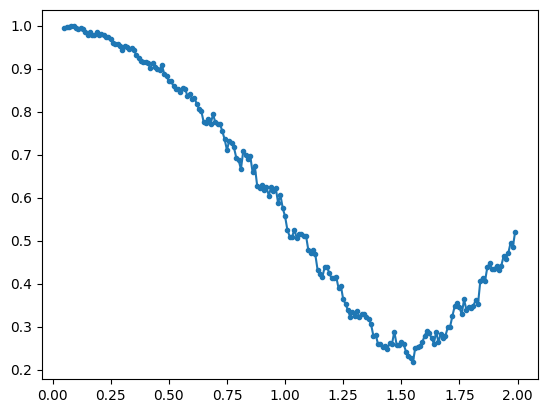

In [85]:
plt.plot(t,A,'.-')

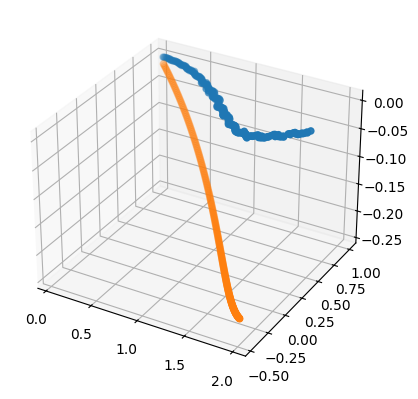

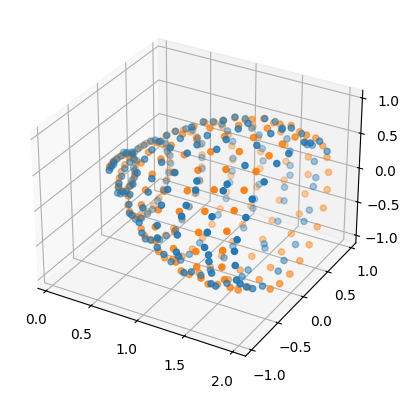

In [106]:
Areal = np.real(A)
Aim = np.imag(A)
alphareal = np.real(alpha(t,w,w0,w1))
alphaim = np.imag(alpha(t,w,w0,w1))
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t,Areal,Aim)
ax.scatter(t,alphareal,alphaim)


Breal = np.real(B)
Bim = np.imag(B)
betareal = np.real(beta(t,w,w0,w1))
betaim = np.imag(beta(t,w,w0,w1))
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t,Breal,Bim)
ax.scatter(t,betareal,betaim)

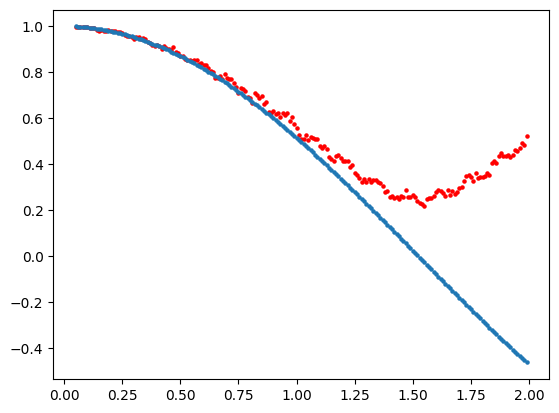

In [107]:

plt.scatter(t,Areal, s=5, color = "red")
plt.scatter(t,alphareal, s = 5)


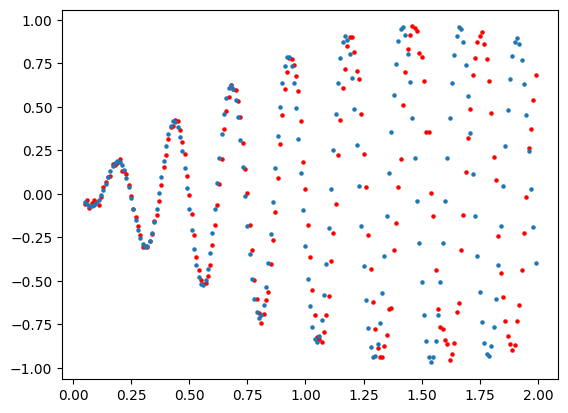

In [108]:
plt.scatter(t,Breal, s=5, color = "red")
plt.scatter(t,betareal, s = 5)

RWA approximation gives frequency offset over time

In [36]:
def population(w,w0,w1,t):
    delta = w-w0
    return w1**2*np.sin(np.sqrt(w1**2+delta**2)*t/2)**2/(w1**2+delta**2)

/opt/miniconda3/envs/cwq/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: x and y can be no greater than 2D, but have shapes (190,) and (190, 2, 2)

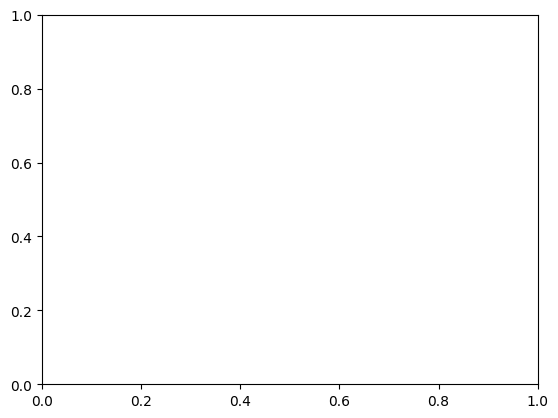

In [37]:
import numpy as np
import qiskit
t = np.arange(0.1,2,0.01)
w1 = 2
w0 =25
w = 25.5
dt = 0.05
Pa = []
Pc = []
for tt in t:
    #print(tt)
    Pa.append(time_evolve(tt,dt,w,w0,w1))
    Pc.append(time_evolve(tt,dt,2,2,2))


plt.plot(t,Pa, label = 'simulation')
#plt.plot(t, population(w,w0,w1,t), label= 'theory', color = "green")
plt.xlabel('time')
plt.ylabel('P(1)')
plt.title('a) Population of state 1 versus time')
plt.legend()
plt.show()
plt.savefig("a.png")